Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200048 non-null  object 
 1   County                                             200044 non-null  object 
 2   City                                               200044 non-null  object 
 3   State                                              200048 non-null  object 
 4   Postal Code                                        200044 non-null  float64
 5   Model Year                                         200048 non-null  int64  
 6   Make                                               200048 non-null  object 
 7   Model                                              200048 non-null  object 
 8   Electric Vehicle Type                              20004

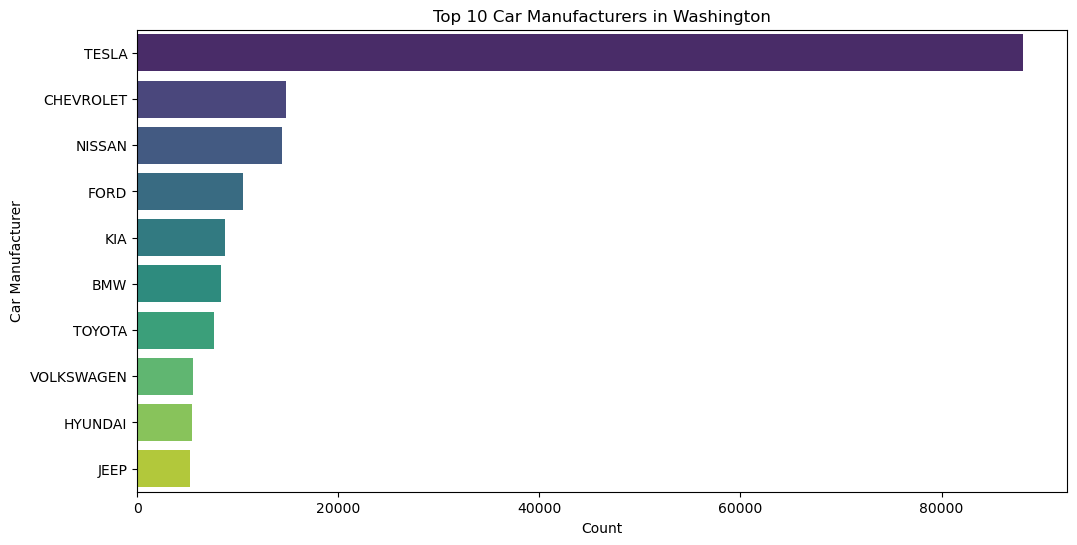


Highest Electric Range:
         Make    Model  Electric Range
1517    TESLA  MODEL S             337
2817    TESLA  MODEL S             337
4067    TESLA  MODEL S             337
9616    TESLA  MODEL S             337
9884    TESLA  MODEL S             337
...       ...      ...             ...
178558  TESLA  MODEL S             337
182420  TESLA  MODEL S             337
190000  TESLA  MODEL S             337
190538  TESLA  MODEL S             337
190793  TESLA  MODEL S             337

[84 rows x 3 columns]

Lowest Electric Range:
              Make    Model  Electric Range
3            TESLA  MODEL 3               0
4            TESLA  MODEL Y               0
8           RIVIAN      R1T               0
16           TESLA  MODEL 3               0
17            AUDI   E-TRON               0
...            ...      ...             ...
200040     HYUNDAI  IONIQ 5               0
200041       TESLA  MODEL Y               0
200044      RIVIAN      R1T               0
200045  VOLKSWAGEN  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


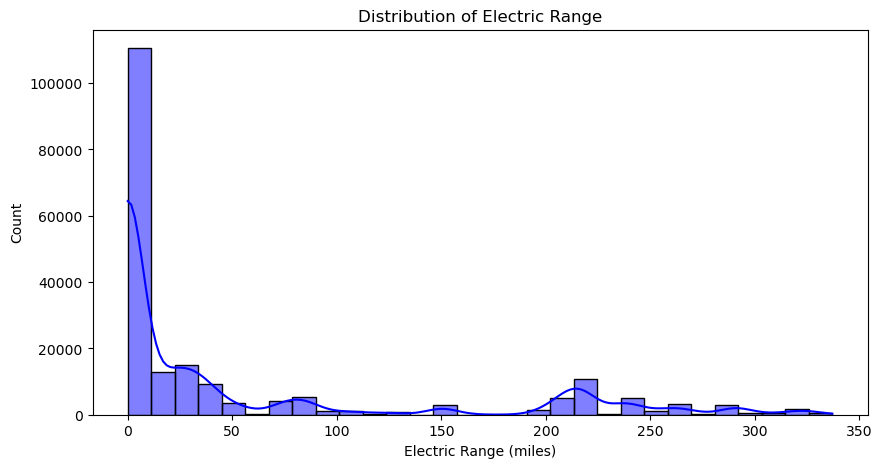


Top 5 Cities with Most EVs:
City
Seattle      32602
Bellevue      9960
Redmond       7165
Vancouver     7081
Bothell       6602
Name: count, dtype: int64


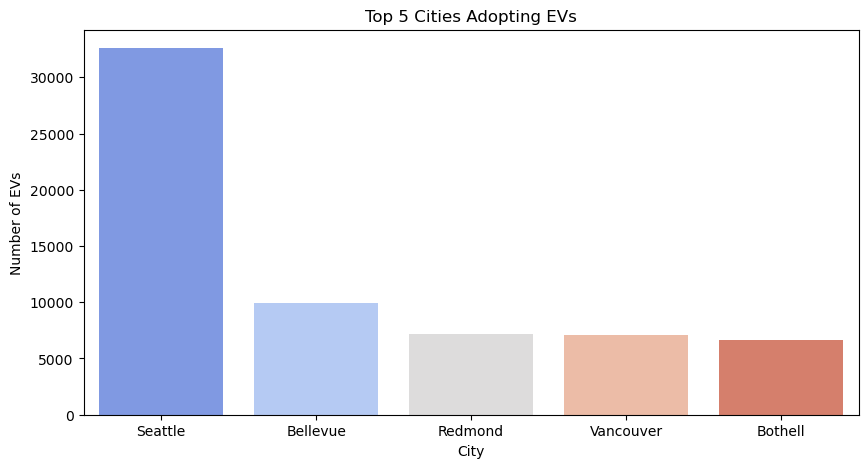


Average Electric Range by City:
City
Saint Louis     322.0
West Chicago    322.0
Little Elm      322.0
Mystic          322.0
Wishram         322.0
Henderson       322.0
Satsop          322.0
Waynesville     322.0
Sparks          308.0
Boca Raton      291.0
Name: Electric Range, dtype: float64


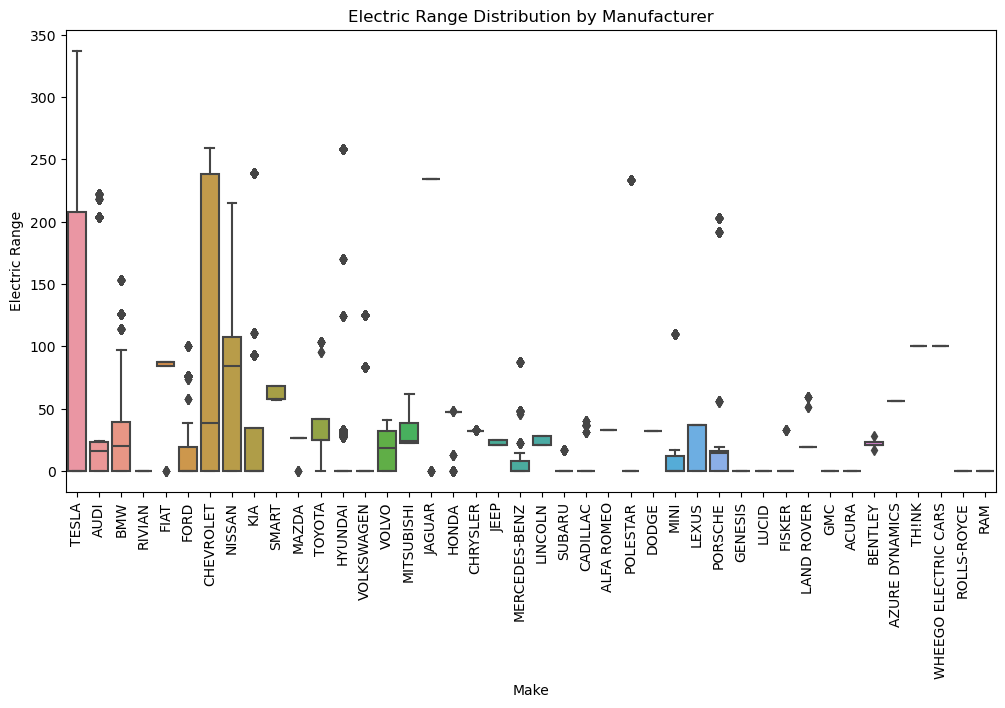


Top Counties with Most Variety of EV Models:
County
King         148
Snohomish    136
Pierce       133
Clark        130
Kitsap       122
Spokane      120
Whatcom      118
Thurston     117
Skagit       104
Island       102
Name: Model, dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("EV.csv")

# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Univariate Analysis: Most common EV manufacturers
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Make'], order=df['Make'].value_counts().index[:10], palette='viridis')
plt.xlabel("Count")
plt.ylabel("Car Manufacturer")
plt.title("Top 10 Car Manufacturers in Washington")
plt.show()

# Finding the highest and lowest electric range
max_range = df['Electric Range'].max()
min_range = df['Electric Range'].min()

print("\nHighest Electric Range:")
print(df[df['Electric Range'] == max_range][['Make', 'Model', 'Electric Range']])

print("\nLowest Electric Range:")
print(df[df['Electric Range'] == min_range][['Make', 'Model', 'Electric Range']])

# Electric Range distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Electric Range'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Count")
plt.show()

# Top 5 cities adopting EVs
top_cities = df['City'].value_counts().head(5)
print("\nTop 5 Cities with Most EVs:")
print(top_cities)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')
plt.title("Top 5 Cities Adopting EVs")
plt.xlabel("City")
plt.ylabel("Number of EVs")
plt.show()

# Correlation between electric range and city
electric_range_city_corr = df.groupby('City')['Electric Range'].mean()
print("\nAverage Electric Range by City:")
print(electric_range_city_corr.sort_values(ascending=False).head(10))

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Make'], y=df['Electric Range'])
plt.xticks(rotation=90)
plt.title("Electric Range Distribution by Manufacturer")
plt.show()

# Variety of EV models by county
county_variety = df.groupby('County')['Model'].nunique().sort_values(ascending=False)
print("\nTop Counties with Most Variety of EV Models:")
print(county_variety.head(10))
